
## Anomaly detection with Hopfield Networks


In [1]:

import torch
import numpy as np


In [2]:

class HopfieldNet:
    
    def __init__(self, size):
        self.size    = size
        self.weights = np.zeros( (size, size) )
    
    def train(self, patterns):
        
        for p in patterns:
            ## self.weights += np.outer(p, p)
            self.weights = self.weights + np.outer(p, p)
            
        np.fill_diagonal( self.weights, 0 )     # No self-connections
        ## self.weights /= len(patterns)
        self.weights = self.weights / len(patterns)
    
    def reconstruct(self, pattern, steps=10):
        
        for _ in range(steps):
            pattern = np.sign(   np.dot(  self.weights, pattern)   )
            
        return pattern


In [3]:

data = np.array(
    [
    [1, 1, 1, -1, 1, 1],  # Sample 1 (normal)
    [1, 1, -1, 1, 1, 1],  # Sample 2 (normal)
    [1, 1, 1, -1, 1, 1],  # Sample 3 (normal)
    [1, 1, 1, -1, 1, 1],  # Sample 4 (normal)
    ]
)


In [4]:

print( data.shape )

data


(4, 6)


array([[ 1,  1,  1, -1,  1,  1],
       [ 1,  1, -1,  1,  1,  1],
       [ 1,  1,  1, -1,  1,  1],
       [ 1,  1,  1, -1,  1,  1]])

In [5]:

hopfield = HopfieldNet( size=6 )

hopfield.weights


array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [6]:

hopfield.train( data )


In [7]:

def hamming_distance(a, b):
    """
    Calculate the Hamming distance between two strings.
    """

    ## arr1 = np.array(list(str1), dtype=int)
    
    # XOR to find differing bits, then count the number of 1s
    return np.count_nonzero(a != b)



## Normal sample


In [8]:

# Test 

test_sample     = [1,  1, 1, -1, 1, 1]

recalled_sample = hopfield.reconstruct(test_sample)

print("Test sample:     ",         test_sample)
print("Recalled sample: ", recalled_sample)



Test sample:      [1, 1, 1, -1, 1, 1]
Recalled sample:  [ 1.  1.  1. -1.  1.  1.]


In [9]:

test_sample_tr     = torch.from_numpy( np.array( test_sample  )   )
recalled_sample_tr = torch.from_numpy( recalled_sample )


distance = hamming_distance(test_sample_tr, recalled_sample_tr)
distance



0


## Abnormal sample


In [10]:

# Test 

test_sample     = [-1, -1, 1, -1, -1, -1]

recalled_sample = hopfield.reconstruct(test_sample)

print("Test sample:     ",         test_sample)
print("Recalled sample: ", recalled_sample)




Test sample:      [-1, -1, 1, -1, -1, -1]
Recalled sample:  [-1. -1. -1.  1. -1. -1.]


In [11]:

test_sample_tr     = torch.from_numpy( np.array( test_sample  )   )
recalled_sample_tr = torch.from_numpy( recalled_sample )

distance = hamming_distance(test_sample_tr, recalled_sample_tr)
distance


2


## Breaking down the operations


In [12]:

size = 6
weights = np.zeros( (size, size) )

for p in data:
    print( p )
    print( np.outer(p, p) )
    weights = weights + np.outer(p, p)
    print( weights ) 
            
    


[ 1  1  1 -1  1  1]
[[ 1  1  1 -1  1  1]
 [ 1  1  1 -1  1  1]
 [ 1  1  1 -1  1  1]
 [-1 -1 -1  1 -1 -1]
 [ 1  1  1 -1  1  1]
 [ 1  1  1 -1  1  1]]
[[ 1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1. -1.  1.  1.]
 [-1. -1. -1.  1. -1. -1.]
 [ 1.  1.  1. -1.  1.  1.]
 [ 1.  1.  1. -1.  1.  1.]]
[ 1  1 -1  1  1  1]
[[ 1  1 -1  1  1  1]
 [ 1  1 -1  1  1  1]
 [-1 -1  1 -1 -1 -1]
 [ 1  1 -1  1  1  1]
 [ 1  1 -1  1  1  1]
 [ 1  1 -1  1  1  1]]
[[ 2.  2.  0.  0.  2.  2.]
 [ 2.  2.  0.  0.  2.  2.]
 [ 0.  0.  2. -2.  0.  0.]
 [ 0.  0. -2.  2.  0.  0.]
 [ 2.  2.  0.  0.  2.  2.]
 [ 2.  2.  0.  0.  2.  2.]]
[ 1  1  1 -1  1  1]
[[ 1  1  1 -1  1  1]
 [ 1  1  1 -1  1  1]
 [ 1  1  1 -1  1  1]
 [-1 -1 -1  1 -1 -1]
 [ 1  1  1 -1  1  1]
 [ 1  1  1 -1  1  1]]
[[ 3.  3.  1. -1.  3.  3.]
 [ 3.  3.  1. -1.  3.  3.]
 [ 1.  1.  3. -3.  1.  1.]
 [-1. -1. -3.  3. -1. -1.]
 [ 3.  3.  1. -1.  3.  3.]
 [ 3.  3.  1. -1.  3.  3.]]
[ 1  1  1 -1  1  1]
[[ 1  1  1 -1  1  1]
 [ 1  1  1 -1  1  1]
 [ 1  1 

In [13]:

np.fill_diagonal( weights, 0 )     

weights


array([[ 0.,  4.,  2., -2.,  4.,  4.],
       [ 4.,  0.,  2., -2.,  4.,  4.],
       [ 2.,  2.,  0., -4.,  2.,  2.],
       [-2., -2., -4.,  0., -2., -2.],
       [ 4.,  4.,  2., -2.,  0.,  4.],
       [ 4.,  4.,  2., -2.,  4.,  0.]])

In [14]:

## self.weights /= len(patterns)
weights = weights / len(data)
weights


array([[ 0. ,  1. ,  0.5, -0.5,  1. ,  1. ],
       [ 1. ,  0. ,  0.5, -0.5,  1. ,  1. ],
       [ 0.5,  0.5,  0. , -1. ,  0.5,  0.5],
       [-0.5, -0.5, -1. ,  0. , -0.5, -0.5],
       [ 1. ,  1. ,  0.5, -0.5,  0. ,  1. ],
       [ 1. ,  1. ,  0.5, -0.5,  1. ,  0. ]])


## Example assumming samples of images size (10, 10)


In [55]:

my_array = [0] * 592 + [1] * 192

my_array = np.array( my_array )

my_array


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [56]:

np.random.shuffle( my_array )

image = my_array

image = image.reshape((28,28))

## image = np.array( image, dtype=np.uint8)   ## for PIL images

print( image.shape )

image


(28, 28)


array([[1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 1, 

In [57]:

states = image * 2 - 1     ##  to polar values of (-1, 1)
states


array([[ 1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1],
       [-1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
        -1, -1, -1,  1, -1, -1,  1, -1, -1,  1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,
        -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1,
        -1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1, -1],
       [-1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,
         1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1, -1,  1,
        -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
         1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
        -1, -1, -1, -1, -

In [58]:

states = states.flatten() 

states


array([ 1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1, -1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1, -1, -1,  1,  1

In [49]:

from PIL import Image


In [50]:

MyImg = Image.fromarray(  image*255   )


In [51]:

MyImg.save('the_image.png')


In [52]:

MyImg


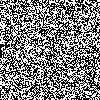

In [47]:

rand_array = np.random.randint(low=0, high=2, size=(100,100), dtype=np.uint8)
im  = Image.fromarray( rand_array * 255)
im
